<a href="https://colab.research.google.com/github/AKVITA380/Deep-Learning-6-July-2024/blob/main/Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclass Classification with keras

Numbers of Classes is more than two then it is a multiclass Classification Problem

In [79]:
  from warnings import filterwarnings
  filterwarnings('ignore')

Step 1 Read Data

In [80]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv"
df=pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Step 2 Basic Quality Check

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [82]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [83]:
df.duplicated().sum()

0

Step 3 Seperate X and Y(price_range)

#### 4 classes to predict in above dataframe


In [84]:
X=df.drop(columns=['price_range'])
Y=df[['price_range']]

In [85]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [86]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


Price Ranges
1. 0 - Cheap
2. 1 - Moderate
3.  High
4. Very Expensive

Step 4: Perform Preproessing on X

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [88]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
('scaler',StandardScaler())]).set_output(transform='pandas')

In [89]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


Step 5 Apply Train and Test Split

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [91]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [92]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [93]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [94]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [95]:
xtrain.shape

(1600, 20)

In [96]:
ytest.shape

(400, 1)

In [97]:
ytrain.shape

(1600, 1)

In [98]:
xtest.shape

(400, 20)

This is applicatble to multiclass classification only,get onehot encoding for target features.

In [99]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [100]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [101]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [102]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [103]:
ytrain_cat.shape[1]

4

Step 6 Build The Nerual Network

In [104]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [105]:
# Intialize model
model=Sequential()

In [106]:
# add Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Create Dense Layer 1
model.add(Dense(64,activation='relu'))
# Create Dense Layer 2
model.add(Dense(32,activation='relu'))
# Create Dense Layer 3
model.add(Dense(16,activation='relu'))

# add Dropout Layer
model.add(Dropout(0.2))

# Create output Layer
model.add(Dense(ytrain_enc.shape[1],activation='softmax'))

In [107]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,020 (15.70 KB)

 Trainable params: 4,020 (15.70 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# add early stopping

In [109]:
es =EarlyStopping(monitor='val_loss',patience=15)

In [110]:
hist=model.fit(
    xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2938 - loss: 1.3880 - val_accuracy: 0.4563 - val_loss: 1.2446
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 1.1789 - val_accuracy: 0.5437 - val_loss: 1.0032
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5814 - loss: 0.9271 - val_accuracy: 0.6687 - val_loss: 0.7700
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6591 - loss: 0.7320 - val_accuracy: 0.7937 - val_loss: 0.6025
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.5719 - val_accuracy: 0.8313 - val_loss: 0.4925
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss: 0.4895 - val_accuracy: 0.8469 - val_loss: 0.4333
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.4194 - val_accuracy: 0.8813 - val_loss: 0.3663
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.3819 - val_accuracy: 0.8844 - v

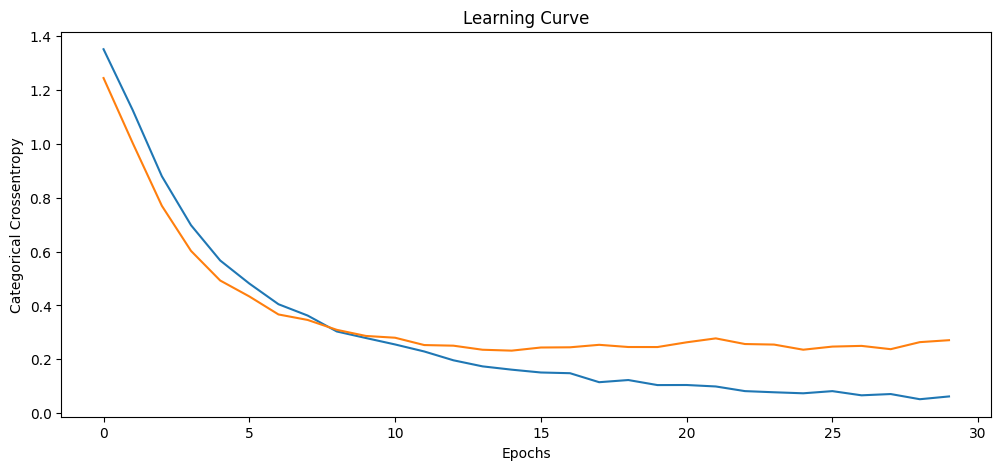

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy")
plt.title('Learning Curve')
plt.show()

# Model Evalatuation

In [112]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9973 - loss: 0.0229


[0.06843939423561096, 0.9793750047683716]

In [113]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9234 - loss: 0.2197  


[0.24988621473312378, 0.9125000238418579]

## Predict the results for Train and Test

In [114]:
ypro_train=model.predict(xtrain)
ypro_test=model.predict(xtest)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [115]:
ypro_train[0:5]

array([[3.3743252e-04, 9.9239814e-01, 7.2643901e-03, 3.1305607e-09],
       [2.2092904e-16, 3.2158377e-07, 9.6893811e-01, 3.1061478e-02],
       [9.5664775e-01, 4.3352272e-02, 2.7452085e-10, 7.9051459e-18],
       [9.1884959e-16, 1.0360700e-08, 3.4187954e-02, 9.6581203e-01],
       [4.7002206e-04, 9.9946344e-01, 6.6504617e-05, 6.4797985e-12]],
      dtype=float32)

In [116]:
ypro_test[0:5]

array([[9.9948078e-01, 5.1910535e-04, 2.1279639e-13, 7.0911446e-22],
       [1.1953284e-08, 3.6397120e-03, 9.9633336e-01, 2.6872933e-05],
       [1.1025875e-04, 9.9988717e-01, 2.5229356e-06, 9.7430971e-16],
       [8.0658285e-21, 1.1476727e-11, 8.0160266e-03, 9.9198395e-01],
       [2.7109956e-04, 9.9926853e-01, 4.6025851e-04, 7.8575639e-11]],
      dtype=float32)

In [117]:
import numpy as np
ypred_train = np.argmax(ypro_train,axis=1)
ypred_test = np.argmax(ypro_test,axis=1)

In [118]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [119]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [120]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [121]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


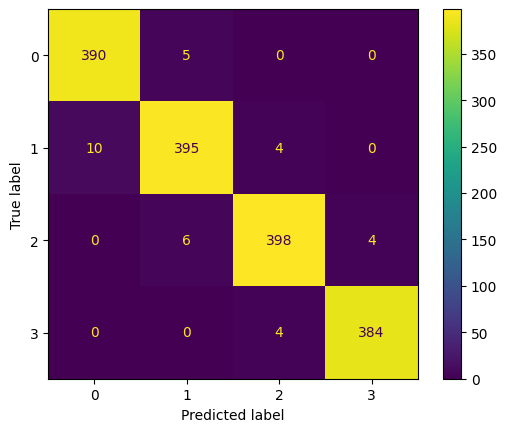

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytrain,ypred_train)

In [123]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.84      0.89      0.86        91
           2       0.94      0.83      0.88        92
           3       0.95      0.97      0.96       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



### Because f1 macro is more than 0.8 hence model is a good model.

Out of Sample predictions

In [126]:
urls = ("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv")
xnew=pd.read_csv(urls)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [127]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [129]:
xnew.isna().sum()

,0
id,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0


In [130]:
xnew.duplicated().sum()

0

In [131]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [132]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [133]:
probs = model.predict(xnew2_pre)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [134]:
probs[0:5]

array([[1.2676984e-18, 2.4804719e-10, 1.4226711e-02, 9.8577321e-01],
       [2.9550586e-22, 6.5836355e-12, 1.3429025e-02, 9.8657095e-01],
       [2.6702035e-12, 6.3992775e-06, 6.0837883e-01, 3.9161468e-01],
       [7.0395802e-28, 1.1433718e-15, 1.3439751e-03, 9.9865609e-01],
       [1.1871208e-03, 9.9858177e-01, 2.3112848e-04, 9.8498709e-11]],
      dtype=float32)

In [135]:
preds = np.argmax(probs, axis=1)
preds[0:5]

array([3, 3, 2, 3, 1])

In [136]:
max_probs = np.max(probs, axis=1)

In [137]:
max_probs[0:5]

array([0.9857732 , 0.98657095, 0.6083788 , 0.9986561 , 0.99858177],
      dtype=float32)

In [139]:
df_final = xnew[['id']]
df_final['price_range_pred'] = preds
df_final['prob'] = max_probs
df_final

,id,price_range_pred,prob
0,1,3,0.985773
1,2,3,0.986571
2,3,2,0.608379
3,4,3,0.998656
4,5,1,0.998582
...,...,...,...
995,996,2,0.513302
996,997,1,0.999709
997,998,1,0.926899
998,999,2,0.772086


<Axes: xlabel='price_range_pred'>

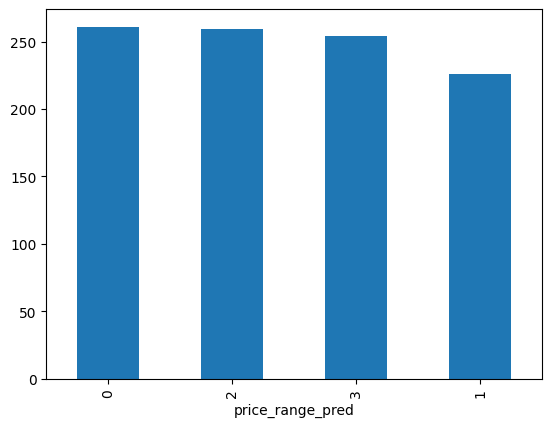

In [140]:
df_final['price_range_pred'].value_counts().plot(kind='bar')

In [141]:
df_final.to_csv('ResultsMobile.csv', index=False)